## Risk factor analysis for Heart Disease using predictive modeling

In [1]:
# Imports

import pandas as pd
import numpy as np

# Imports for visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for stats
import statsmodels.api as sm
from scipy import stats

# Imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA

# Imports for Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
# Imports for statsmodel
import statsmodels.api as sm
from scipy import stats

# Imports for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

# Imports for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier ####
from sklearn.tree import plot_tree

# Imports for Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Imports for SVM Classifier
from sklearn.svm import SVC

# Imports for KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Imports for XGB Classifier
from xgboost import XGBClassifier 
from xgboost import plot_importance
import pickle
import xgboost as xgb

# Imports for LGB Classifier
import lightgbm as lgb

# Imports for MLP Classifier

from sklearn.neural_network import MLPClassifier

# Imports for Ensemble Classifier
from sklearn.ensemble import StackingClassifier


# Other imports
import pretty_errors
import warnings
warnings.simplefilter("ignore")

In [2]:

raw_df=pd.read_csv('/Users/tridibdutta/Documents/Jupyter_Notebooks/DATA/heart_failure_clinical_records_dataset 3.csv')



In [3]:
df=raw_df.copy()

In [4]:
df.shape

(299, 13)

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Variables


1. **age**: The age of the patient.
2. **anaemia**: A binary variable indicating whether the patient has anaemia (1) or not (0).
3. **creatinine_phosphokinase**: The level of the creatinine phosphokinase enzyme in the blood (mcg/L).
4. **diabetes**: A binary variable indicating whether the patient has diabetes (1) or not (0).
5. **ejection_fraction**: Percentage of blood leaving the heart at each contraction.
6. **high_blood_pressure**: A binary variable indicating whether the patient has high blood pressure (1) or not (0).
7. **platelets**: The number of platelets in the blood (kiloplatelets/mL).
8. **serum_creatinine**: The level of serum creatinine in the blood (mg/dL).
9. **serum_sodium**: The level of serum sodium in the blood (mEq/L).
10. **sex**: A binary variable indicating the gender of the patient, where 1 is male and 0 is female.
11. **smoking**: A binary variable indicating whether the patient smokes (1) or not (0).
12. **time**: Follow-up period (days).
13. **DEATH_EVENT**: A binary variable indicating whether the patient died during the follow-up period (1) or survived (0).


In [8]:
# Check for missing values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
#Check for duplicates
df.duplicated().sum()

0

In [10]:
zero_counts = {}


for col in df.columns:
    # Count the occurrences of zero values in the column
    zero_counts[col] = (df[col] == 0).sum()

# Display the counts
print(zero_counts)


{'age': 0, 'anaemia': 170, 'creatinine_phosphokinase': 0, 'diabetes': 174, 'ejection_fraction': 0, 'high_blood_pressure': 194, 'platelets': 0, 'serum_creatinine': 0, 'serum_sodium': 0, 'sex': 105, 'smoking': 203, 'time': 0, 'DEATH_EVENT': 203}


There are no missing values in the dataset. Each column is fully populated, indicating that the dataset is complete with respect to the variables provided for each patient record.

In [11]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


The dataset comprises measurements and observations for 299 patients, providing a substantial base for analysis regarding heart failure clinical records.

Age- The average age of patients in this study is approximately 60.83 years, with a standard deviation of 11.89 years. This indicates a middle-aged to elderly patient demographic, which is relevant given the increased risk of heart failure with age.
The ages range from 40 to 95 years, suggesting the dataset covers a wide age range of adults, emphasizing the importance of heart health across different stages of adult life.

Anaemia-About 43.14% of the patients have anaemia, which could be a significant factor in heart health, as anaemia can affect the heart's ability to pump blood efficiently.

Creatinine Phosphokinase-The enzyme levels in the blood vary widely (from 23 to 7861 mcg/L), with a mean value of 581.84 mcg/L. High levels of CPK can indicate stress to heart muscles, among other conditions.

Diabetes- Approximately 41.81% of the patients have diabetes, which is a known risk factor for heart disease, highlighting the intersection between diabetes management and heart health.

Ejection Fraction- The ejection fraction, indicating the percentage of blood leaving the heart at each contraction, has a mean value of 38.08%. Values range widely from 14% to 80%, where lower percentages can indicate heart failure.

High Blood Pressure- Around 35.12% of the patients suffer from high blood pressure, another critical factor that can contribute to heart health complications.

Platelets- Platelet counts in the blood are on average about 263,358 per microliter, with a broad range from 25,100 to 850,000, indicating diverse health conditions across the patient population.

Serum Creatinine- Mean serum creatinine levels are 1.39 mg/dL, with a range from 0.5 to 9.4 mg/dL. Elevated serum creatinine can be a marker for kidney dysfunction, which is closely related to heart health.

Serum Sodium- The average serum sodium level is 136.63 mEq/L, within the standard range, but variations from 113 to 148 mEq/L suggest some patients have electrolyte imbalances, affecting heart function.

Sex- The dataset indicates a majority male population (64.88%), reflecting the need to consider gender differences in heart failure research and treatment strategies.

Smoking- 32.11% of the patients are smokers, which is a well-known risk factor for developing cardiovascular diseases.

Time (Follow-up Period)- The follow-up period ranges widely from 4 to 285 days, with a median of 115 days. This variable likely correlates with survival or event rates, indicating the progression of heart failure over time.

 DEATH_EVENT- The target variable shows that 32.11% of the patients in the dataset experienced a death event. This outcome variable is crucial for developing predictive models aimed at improving patient care and outcomes.

<Figure size 2000x2000 with 0 Axes>

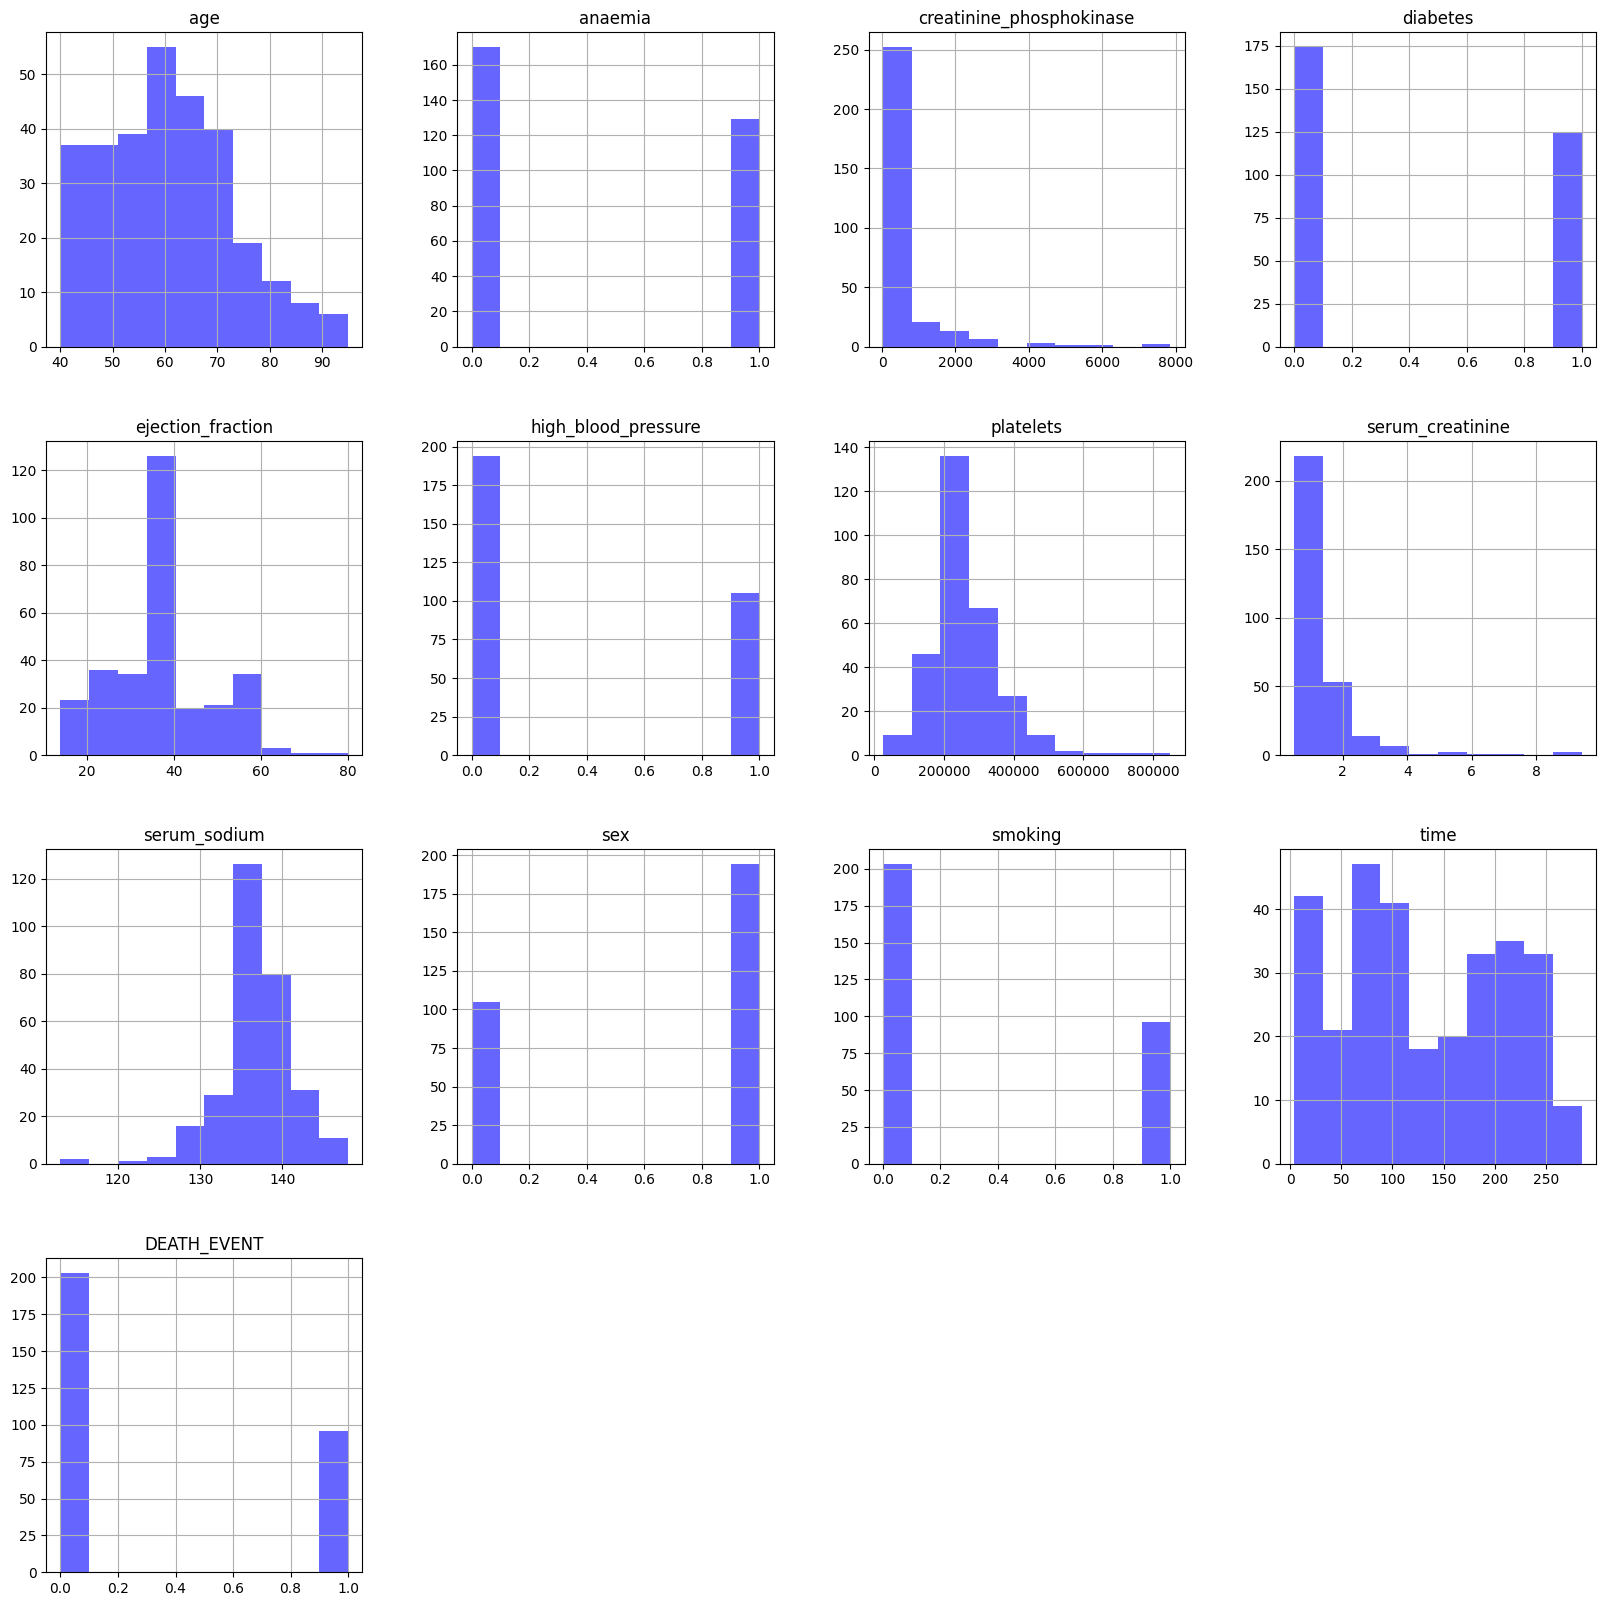

In [12]:

plt.figure(figsize=(20, 20))
df.hist(color='blue', alpha=0.6, figsize=(20,20))

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms of Diabetes Data')

# Show plot
plt.show()




In [13]:
grouped_by_death = df.groupby('DEATH_EVENT').mean()
grouped_by_death

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,58.761906,0.408867,540.054187,0.418719,40.26601,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901
1,65.215281,0.479167,670.197917,0.416667,33.46875,0.406250,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417


The dataset grouped by the `DEATH_EVENT` column with mean values for all other variables provides insights into the differences between patients who survived and those who did not. Here's a summary of the mean values of each variable based on the outcome (survival or death):

- **Age**: Patients who did not survive had a higher average age (65.22 years) compared to those who survived (58.76 years).
- **Anaemia**: A slightly higher proportion of patients who did not survive had anaemia (47.92%) compared to those who survived (40.89%).
- **Creatinine Phosphokinase**: The average level was higher in patients who did not survive (670.20 mcg/L) than in those who survived (540.05 mcg/L).
- **Diabetes**: The proportion of patients with diabetes was similar between those who survived (41.87%) and those who did not survive (41.67%).
- **Ejection Fraction**: The average ejection fraction was lower in patients who did not survive (33.47%) compared to those who survived (40.27%).
- **High Blood Pressure**: A higher proportion of patients who did not survive had high blood pressure (40.62%) compared to those who survived (32.51%).
- **Platelets**: The average platelet count was slightly lower in patients who did not survive (256,381.04 kiloplatelets/mL) compared to those who survived (266,657.49 kiloplatelets/mL).
- **Serum Creatinine**: The average level of serum creatinine was higher in patients who did not survive (1.84 mg/dL) than in those who survived (1.18 mg/dL).
- **Serum Sodium**: The average level of serum sodium was lower in patients who did not survive (135.38 mEq/L) compared to those who survived (137.22 mEq/L).
- **Sex**: The proportion of males was similar in both groups, with a slight difference (64.58% in the non-survivors vs. 65.02% in the survivors).
- **Smoking**: The proportion of smokers was slightly lower in patients who did not survive (31.25%) compared to those who survived (32.51%).
- **Time**: The average follow-up time was significantly lower for patients who did not survive (70.89 days) compared to those who survived (158.34 days).

This analysis suggests that factors such as higher age, lower ejection fraction, higher serum creatinine levels, and lower serum sodium levels may be associated with a higher risk of death in heart failure patients.

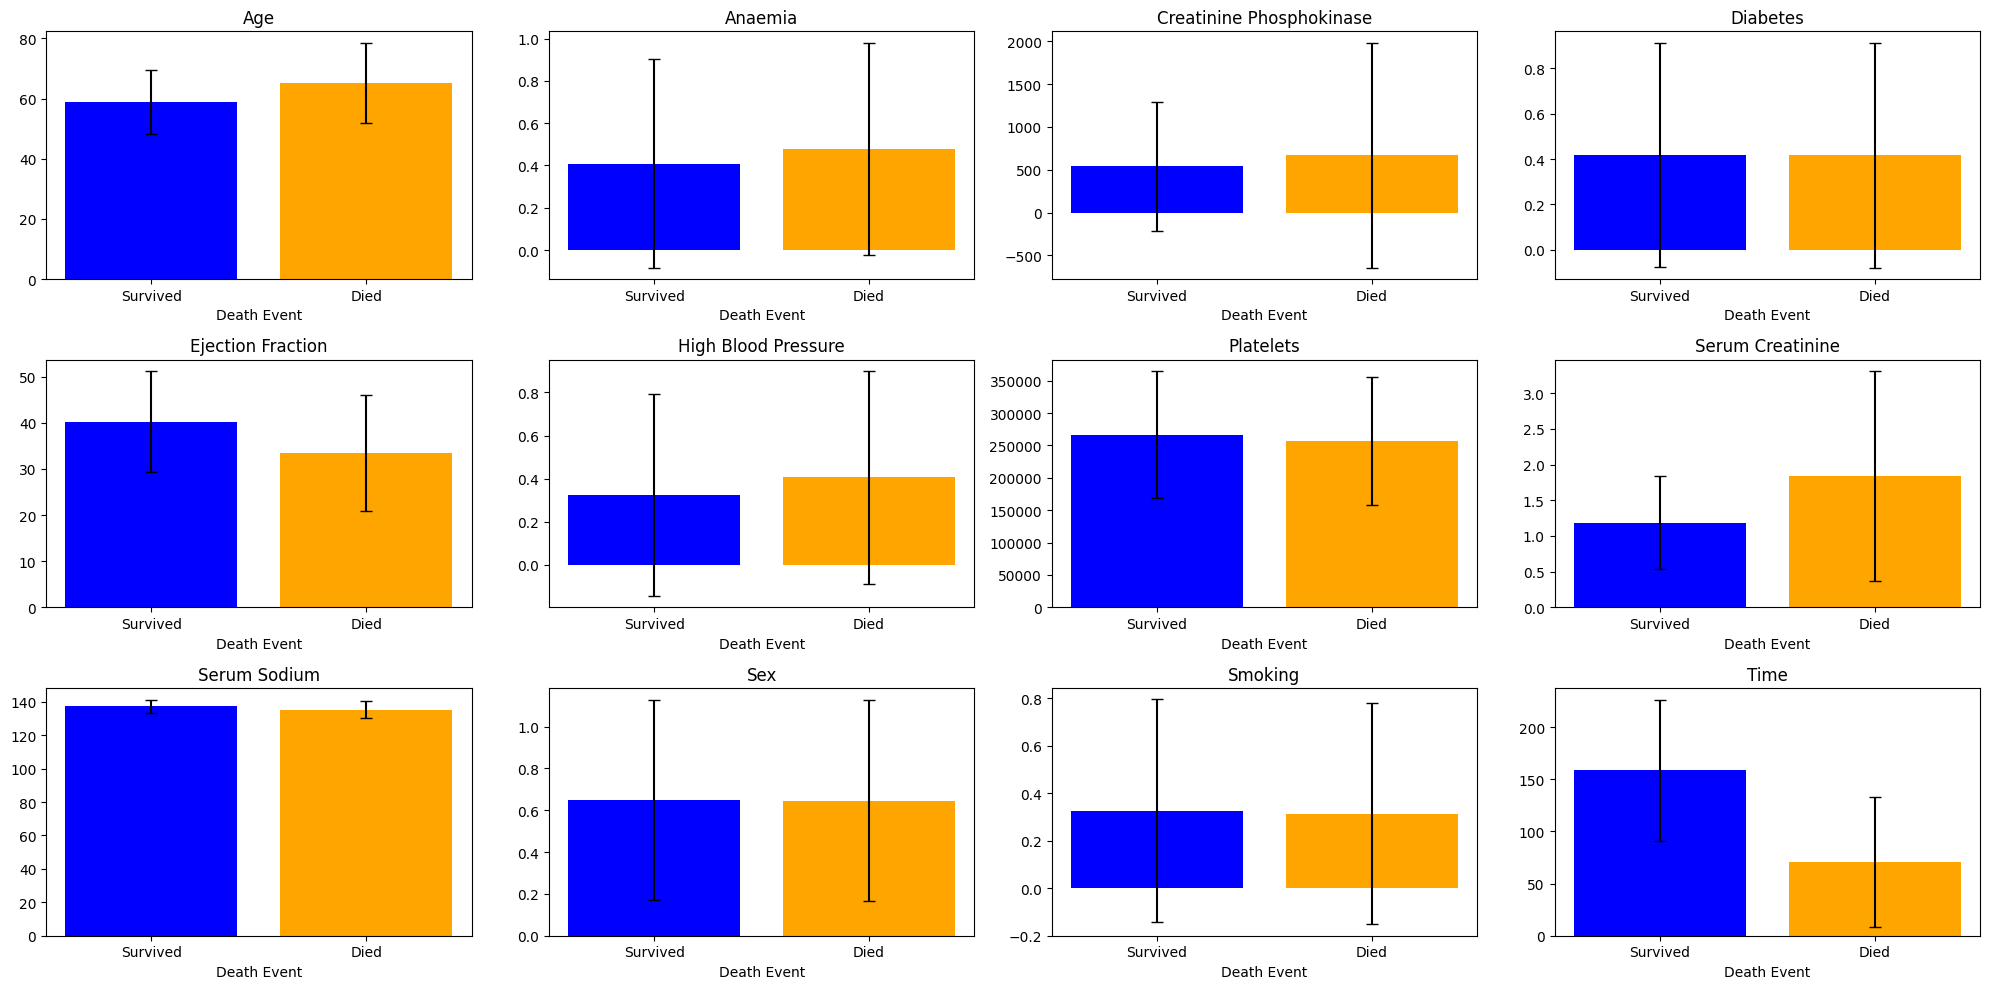

In [14]:


# Calculate means and standard deviations
means = df.groupby('DEATH_EVENT').mean()
std_devs = df.groupby('DEATH_EVENT').std()

plt.figure(figsize=(20, 10))

for i, column in enumerate(means.columns):
    plt.subplot(3, 4, i + 1)
    plt.bar(x=means.index, height=means[column], yerr=std_devs[column], color=['blue', 'orange'], capsize=4)
    plt.title(column.replace('_', ' ').title())
    plt.xlabel('Death Event')
    plt.xticks([0, 1], ['Survived', 'Died'])

plt.tight_layout()
plt.show()






The bar charts shows that age, ejection volume, blood pressure serum creatinine, and time could play a significant role in prediction.

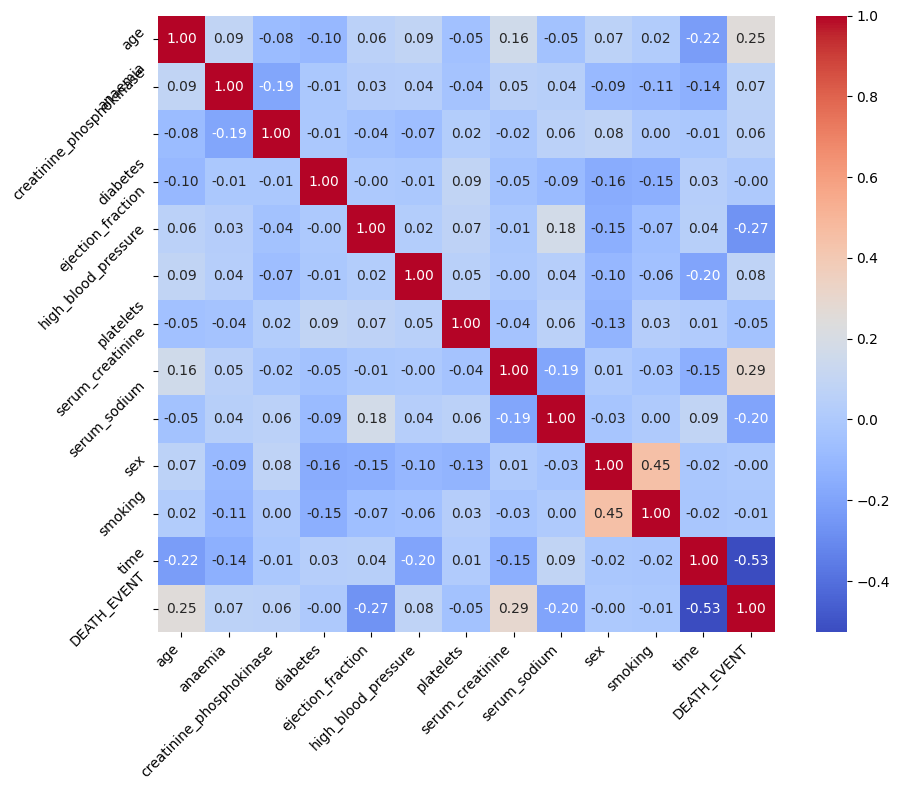

In [15]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Adjust layout for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

The correlation matrix does not show significant correlations.We will look at seperate correlation matrix for live and dead cases.

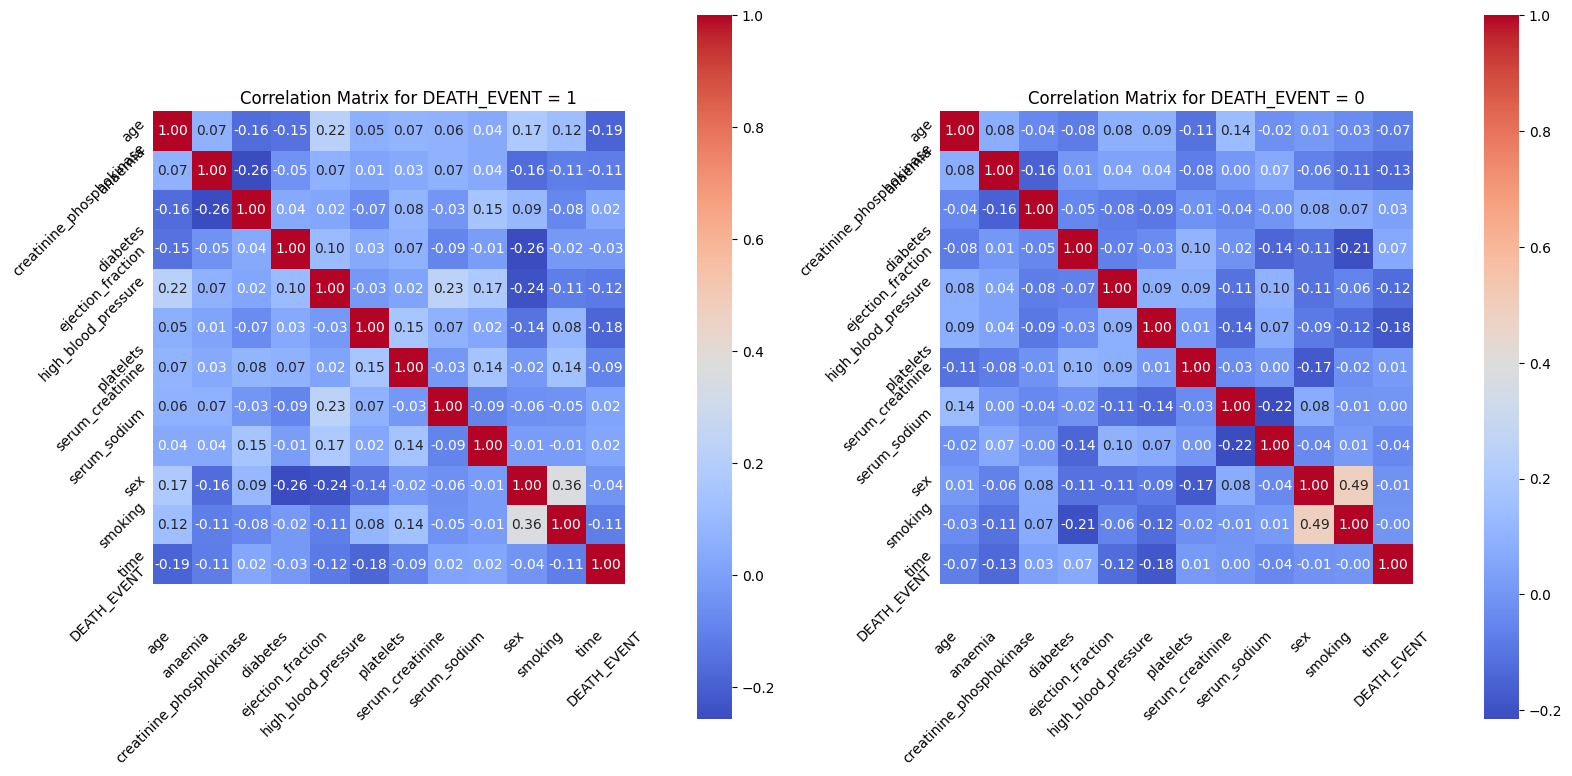

In [16]:


# Filter DataFrame based on 'DEATH_EVENT'
death_df = df[df['DEATH_EVENT'] == 1]  # Filter for DEATH_EVENT = 1
alive_df = df[df['DEATH_EVENT'] == 0]  # Filter for DEATH_EVENT = 0

# Calculate correlation matrices for each group
death_corr_matrix = death_df.corr()
alive_corr_matrix = alive_df.corr()

# Set up the matplotlib figures
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Generate heatmaps for DEATH_EVENT = 1
sns.heatmap(death_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, ax=axes[0])
axes[0].set_title('Correlation Matrix for DEATH_EVENT = 1')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=45)
axes[0].tick_params(axis='both', which='both', length=0)  # Remove ticks

# Generate heatmaps for DEATH_EVENT = 0
sns.heatmap(alive_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, ax=axes[1])
axes[1].set_title('Correlation Matrix for DEATH_EVENT = 0')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=45)
axes[1].tick_params(axis='both', which='both', length=0)  # Remove ticks

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()


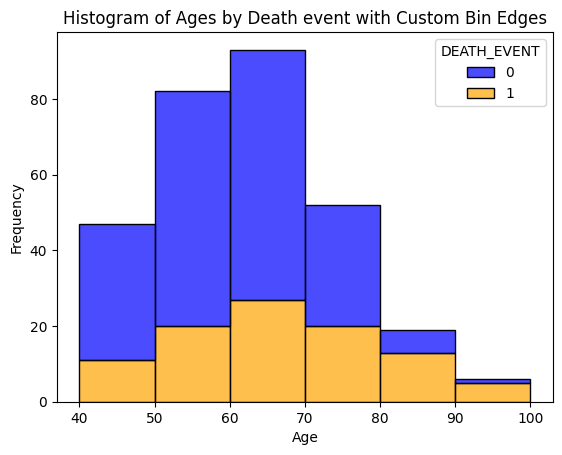

In [17]:
#Age groups

# Define bin edges
bin_edges = [40, 50, 60, 70, 80, 90, 100]



# Custom palette: Assigning 'red' to diabetic outcome (assuming '1' represents diabetic)
palette = {0: "blue", 1: "orange"}

# Using seaborn's histplot to plot histograms for each outcome category
sns.histplot(data=df, x='age', hue='DEATH_EVENT', bins=bin_edges, palette=palette, edgecolor='black', alpha=0.7, multiple='stack')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages by Death event with Custom Bin Edges')

# Show the plot
plt.show()

The histogram shows that the ration of living to death significantly changes from 70.

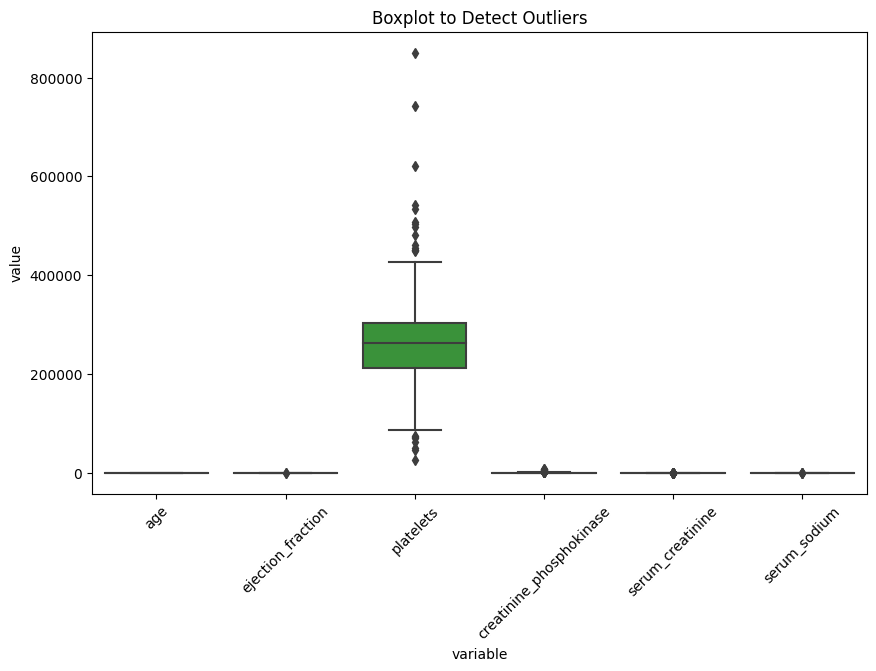

In [18]:
# Detecting outliers in data apart from Age and sex
df_melted = df[['age','ejection_fraction','platelets','creatinine_phosphokinase','serum_creatinine', 'serum_sodium']].melt()
#'platelets',#'creatinine_phosphokinase'

# Now plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Boxplot to Detect Outliers', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate x labels for better readability
plt.yticks(fontsize=10)
plt.show()


Outliers are not very unreasonable so they will not be addressed. 

## TRAIN TEST SPLIT

In [19]:
# Split the dataset to train and test before imputation

# Define X and y
X = df#[[ 'age', 'ejection_fraction', 'serum_creatinine', 'time']] 
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
       
       
 ####'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','high_blood_pressure', 'platelets','serum_sodium', 'sex', 'smoking',       
       

In [20]:
#Standard scalar is used as most of the data follows Guassian distribution
# Initialize the scaler
scaler = StandardScaler().set_output(transform = 'pandas')
#scaler = MinMaxScaler().set_output(transform = 'pandas')  ##########always tranform

# Fit on training data and transform it ##### just do the x_train first
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [21]:
#PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform both the scaled training and testing data using the fitted PCA
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

In [22]:
np.cumsum(pca.explained_variance_ratio_)

array([0.15836943, 0.28857994, 0.39203367, 0.47916132, 0.56030113,
       0.63734094, 0.70631495, 0.77025507, 0.83144483, 0.88453073,
       0.93317071, 0.97254464, 1.        ])

In [23]:
X_train_scaled_pca=pd.DataFrame(X_train_pca).iloc[:,:11]

X_test_scaled_pca=pd.DataFrame(X_test_pca).iloc[:,:11]

X_train_scaled_pca.index=y_train.index

X_test_scaled_pca.index=y_test.index


## Logistic Regression

In [24]:
X = df.drop('DEATH_EVENT', axis=1)  # Features
y = df['DEATH_EVENT']  # Target variable

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)



In [25]:
print("Default Logistic Regression")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Default Logistic Regression
Accuracy: 0.800000
Precision: 0.933333
Recall: 0.560000
F1 Score: 0.700000


In [26]:
parameters = {
    'C': [0.001, 0.01, 0.1, 1],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [50,60,70,80,90,100,150, 200]
}

# GridSearchCV
grid_search = GridSearchCV(log_reg, parameters, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 0.01, 'max_iter': 50, 'solver': 'liblinear'}


In [27]:
y_pred = grid_search.predict(X_test_scaled)

In [28]:
print("Tuned Logistic Regression")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Tuned Logistic Regression
Accuracy: 0.800000
Precision: 0.933333
Recall: 0.560000
F1 Score: 0.700000


Tuning did not improve the logistic regression model. 

## Statsmodel

In [29]:

# # Addition of constant to the model (the intercept)
# X_train_scaled = sm.add_constant(X_train_scaled)
# # Fit the model
# model = sm.Logit(y_train, X_train_scaled).fit()

# print(model.summary())

The p-values provided in the regression analysis indicate the statistical significance of each variable in predicting the outcome (in this case, perhaps survival or a related measure). A p-value below a certain threshold (usually 0.05) suggests that the variable is statistically significant and has a meaningful effect on the outcome. 

In the provided analysis:
- Age (p = 0.002), ejection fraction (p = 0.000), serum creatinine (p = 0.000), and time (p = 0.000) all have p-values below 0.05, indicating they are statistically significant predictors.
- Anaemia, creatinine phosphokinase, diabetes, high blood pressure, platelets, serum sodium, sex, and smoking have p-values above 0.05, suggesting they are not statistically significant predictors in this model.
- Variables with statistically significant p-values may have a meaningful impact on the outcome and should be considered important factors in the prediction model. Conversely, variables with non-significant p-values may not contribute significantly to the prediction and can potentially be excluded from the model to improve its accuracy and interpretability.

In [30]:
# #After running statsmodel remove constant 

# X_train_scaled.drop('const',axis=1, inplace=True)

## Logistic Regression with Feature Selection

In [31]:

sig_cols = [ 'serum_creatinine', 'ejection_fraction', 'time']
X = df[sig_cols]  # Selecting only the significant columns for features
y = df['DEATH_EVENT']  # Target variable

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Initilaization
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)

# Predictions
y_fs_pred = log_reg.predict(X_test_scaled)

# Evaluation
print("Feature Selected Logistic Regression")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_fs_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_fs_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_fs_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_fs_pred))


Feature Selected Logistic Regression
Accuracy: 0.800000
Precision: 0.882353
Recall: 0.600000
F1 Score: 0.714286


Selecting 'serum_creatinine', 'ejection_fraction', 'time' gave the better F1scores than PCA. In order words PCA on the defalt model did not improve the scores. 

## Decision Tree

In [32]:
sig_cols = [ 'serum_creatinine', 'ejection_fraction', 'time']
X = df[sig_cols]  # Selecting only the significant columns for features
y = df['DEATH_EVENT']  # Target variable

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialization the classifier

dt_clf = DecisionTreeClassifier(random_state=42)

# Training the model

dt_clf.fit(X_train_scaled, y_train)

# Predicting the test set results

y_dt_pred = dt_clf.predict(X_test_scaled)

# Evaluation the model

print("Default Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_dt_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_dt_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_dt_pred))



Default Decision Tree
Accuracy: 0.766667
Precision: 0.761905
Recall: 0.640000
F1 Score: 0.695652


In [33]:
# Hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [34]:
# Train the classifier
dt_clf.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_bedt_pred = dt_clf.predict(X_test_scaled)

print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_bedt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_bedt_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_bedt_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_bedt_pred))

Accuracy: 0.766667
Precision: 0.761905
Recall: 0.640000
F1 Score: 0.695652


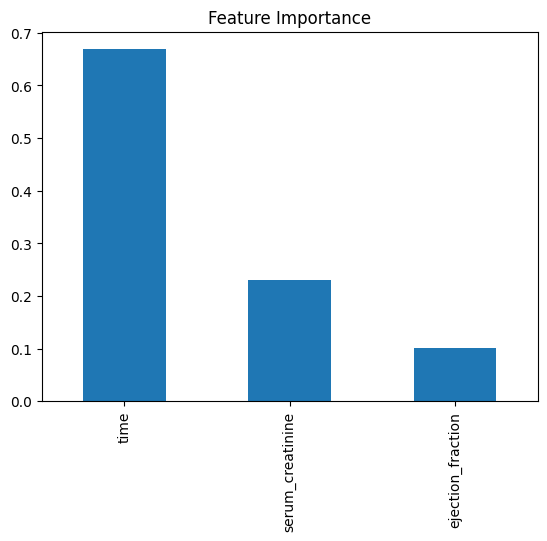

In [35]:
# Feature importances
feature_importances = pd.Series(dt_clf.feature_importances_, index=X.columns)

feature_importances.nlargest(8).plot(kind='bar')  # Adjust the number as needed
plt.title('Feature Importance')
plt.show()

## Random Forest

In [41]:
sig_cols = [ 'serum_creatinine', 'ejection_fraction', 'time']
X = df[sig_cols]  # Selecting only the significant columns for features
y = df['DEATH_EVENT']  # Target variable

# Initialize the classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)   

# Train the classifier 
rf_clf.fit(X_train_scaled, y_train)  

# Training the model

rf_clf.fit(X_train_scaled, y_train)

# Predicting the test set results

y_rf_pred = dt_clf.predict(X_test_scaled)

# Evaluation the model

print("Default Random Forest")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_rf_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_rf_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_rf_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_rf_pred))

Default Random Forest
Accuracy: 0.766667
Precision: 0.761905
Recall: 0.640000
F1 Score: 0.695652


In [42]:


# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)# Train the classifier
rf_clf.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_berf_pred = rf_clf.predict(X_test_scaled)

print("Tuned Random Forest")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_berf_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_berf_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_berf_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_berf_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest
Accuracy: 0.783333
Precision: 0.800000
Recall: 0.640000
F1 Score: 0.711111


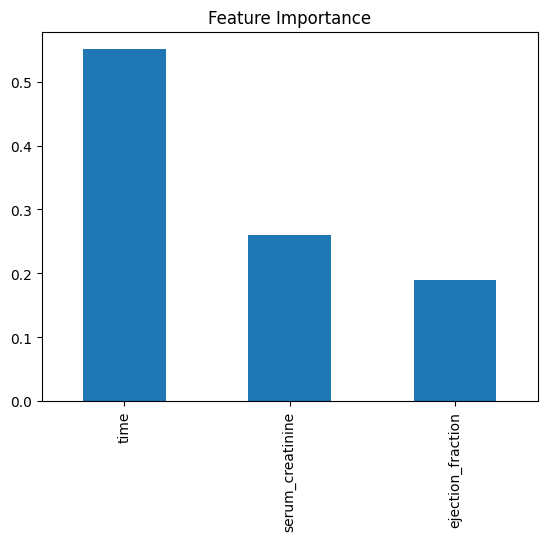

In [43]:
# Feature importances
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)

feature_importances.nlargest(8).plot(kind='bar')  # Adjust the number as needed
plt.title('Feature Importance')
plt.show()

## XGBoost Classifier

In [ ]:
# xgb_clf = XGBClassifier(objective='binary:logistic', random_state=0)

# parameters = {
#     'max_depth': [1, 2, 3, 4, 5],
#     'n_estimators': [50, 75, 100, 150, 200, 250],
#     'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
#     'subsample': [0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
#     'reg_alpha': [0.0, 0.1, 0.2, 0.3, 0.4],
#     'reg_lambda': [0.0, 0.1, 0.2, 0.3, 0.4]
# }

# grid_search = GridSearchCV(xgb_clf, parameters, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# best_parameters = grid_search.best_params_
# print("Best Parameters:", best_parameters)

# # Using the best estimator directly
# best_xgb_clf = grid_search.best_estimator_
# y_xgb_pred = best_xgb_clf.predict(X_test_scaled)

# print("Tuned XGBoost")
# print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_mlp_pred)) 
# print("Precision:", "%.6f" % metrics.precision_score(y_test, y_mlp_pred)) 
# print("Recall:", "%.6f" % metrics.recall_score(y_test, y_mlp_pred)) 
# print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_mlp_pred))

## Neural Net MLP Classifier

In [ ]:
sig_cols = [ 'serum_creatinine', 'ejection_fraction', 'time']
X = df[sig_cols]  # Selecting only the significant columns for features
y = df['DEATH_EVENT']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating the MLPClassifier
# This is a simple configuration; you might need to adjust the parameters depending on your dataset size and feature complexity
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)

# Training the model
mlp_clf.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = mlp_clf.predict(X_test_scaled)

# Evaluating the model

# Evaluation
print("MLP Default")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))


In [ ]:
sig_cols = [ 'serum_creatinine', 'ejection_fraction', 'time']
X = df[sig_cols]  # Selecting only the significant columns for features
y = df['DEATH_EVENT']  # Target variable


# Splitting the dataset into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the MLPClassifier
mlp = MLPClassifier(max_iter=300, random_state=42)

# Defining the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}



# Setting up GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Predicting the test set results with the best estimator found
y_mlpbe_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Evaluating the model
print("Tuned MLP")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_mlpbe_pred)) 
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_mlpbe_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_mlpbe_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_mlpbe_pred))


## SVM

In [ ]:
sig_cols = [ 'serum_creatinine', 'ejection_fraction', 'time']
X = df[sig_cols]  # Selecting only the significant columns for features
y = df['DEATH_EVENT']  # Target variable


# Splitting the dataset into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Classifier model
svm_clf = SVC(random_state=42)

# Training the model
svm_clf.fit(X_train_scaled, y_train)

# Predicting the test set results
y_svm_pred = svm_clf.predict(X_test_scaled)

# Evaluating the model

# Evaluation
print("SVM Default")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_svm_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_svm_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_svm_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_svm_pred))

In [ ]:
# Parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Specifies the kernel type to be used in the algorithm
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Grid search for model tuning
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)

# Predicting the test set results with the best estimator
y_svmbe_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Evaluation
print("SVM Tuned")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_svmbe_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_svmbe_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_svmbe_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_svmbe_pred))


## Light GBM

In [ ]:
# sig_cols = [ 'serum_creatinine', 'ejection_fraction', 'time']
# X = df[sig_cols]  # Selecting only the significant columns for features
# y = df['DEATH_EVENT']  # Target variable


# # Splitting the dataset into the training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scaling the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


# # Defining the LightGBM classifier
# lgb_clf = lgb.LGBMClassifier(random_state=42)

# # Training the model
# lgb_clf.fit(X_train_scaled, y_train)

# # Predicting the test set results
# y_lgb_pred = svm_clf.predict(X_test_scaled)


# print("LGBM Default")
# print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_lgb_pred)) 
# print("Precision:", "%.6f" % metrics.precision_score(y_test, y_lgb_pred)) 
# print("Recall:", "%.6f" % metrics.recall_score(y_test, y_lgb_pred)) 
# print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_lgb_pred))

In [ ]:
# Defining the parameter grid
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)

# Training the model
lgb_clf.fit(X_train_scaled, y_train)

# Predicting the test set results
y_lgbbe_pred = svm_clf.predict(X_test_scaled)


print("LGBM Tuned")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_lgbbe_pred)) 
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_lgbbe_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_lgbbe_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_lgbbe_pred))

In [ ]:
# # Defining the parameter grid
# param_grid = {
#     'num_leaves': [31, 50, 100],
#     'max_depth': [-1, 5, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 500],
# }

# # Setting up GridSearchCV
# grid_search = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# grid_search.fit(X_train_scaled, y_train)

# # Best parameters and best score
# print("Best Parameters:", grid_search.best_params_)


# # Training the model
# lgb_clf.fit(X_train_scaled, y_train)

# # Predicting the test set results
# y_lgb_pred = svm_clf.predict(X_test_scaled)


# print("LGBM Default")
# print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_lgb_pred)) 
# print("Precision:", "%.6f" % metrics.precision_score(y_test, y_lgb_pred)) 
# print("Recall:", "%.6f" % metrics.recall_score(y_test, y_lgb_pred)) 
# print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_lgb_pred))


## Ensemble model 

In [ ]:
# Removed SVM and LGBM
# Define MLP parameters
mlp_params = {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'solver': 'sgd'}

# Define the list of estimators
estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('mlp', MLPClassifier(**mlp_params)),
    ('svm', SVC(probability=True, random_state=42)),  
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(random_state=42))  # Add Decision Tree classifier
]

stc_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(), cv=5
)


stc_clf.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print("Test score: ", stc_clf.score(X_test_scaled, y_test))

# Make predictions on the test set

y_stc_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calculate the scores
print("Ensemble Model")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_stc_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_stc_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_stc_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_stc_pred))


## Confusion Matrix of Feature selected logistic regression

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_fs_pred)  

# Create the confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()

# Optionally, customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Model performance -Insights from the confusion matrix: 

From the test set- TN-33 actually alive and predicted correctly as alive, TP-15 actually dead and predicted corectly as dead. FN-10 actually dead and predicted wrongly as alive FP-2 actually alive and predicted wrongly as dead.

F1 score covers information for all the quadrants hence it is a better readout of the model performance.

In the healthcare setting, the goal would often be to minimize the false negatives and false positives to ensure that all potential diabetic patients are identified for further testing and treatment.

## CONCLUSION


This dataset provides valuable insights into the multifaceted nature of heart failure, highlighting the importance of comprehensive approaches to treatment and management that address not just the heart condition itself but also associated comorbidities and lifestyle factors. The data supports the need for personalized care strategies that consider the wide range of factors affecting heart failure outcomes, from biomarkers and physiological measurements to lifestyle habits and comorbid conditions. 


** Key features
-Elevated creatinine phosphokinase can serve as a biomarker to predict heart health as high levels suggest stress on heart muscles and potential kidney issues, respectively, which are critical in the assessment and management of heart failure.
-Follow up time ranged from 4-285 days, frequent follow ups particularly in older population may reduce incidence of heart failure. 


- The dataset confirms that heart failure is more prevalent in the middle-aged to elderly population, underscoring the importance of monitoring heart health as part of aging.
- Anaemia, diabetes and blood pressure are present in a significant portion of the patient population, highlighting the complexity of managing heart failure alongside these conditions. All three are known to exacerbate heart failure symptoms and outcomes, indicating a need for integrated care approaches.
- Life style changes like smoking cessation efforts among patients can reduce risk.


** Data bias
- It was hard to determine which sex is more prone to poor heart health due to imbalanced data set in terms of sex.

** Modeling
Logistic Regression with feature selection performed the best of the features selected time was the most import variable indicating that the regular follow up visits will help reduce the incidence of the fatal disease.

Future research and predictive modeling approaches based on more detailed datasets can help in identifying high-risk patients earlier and tailoring interventions to improve outcomes for those suffering from heart failure. 

**Features that can enable robust predictions are-
Lifestyle Factors-Diet, Physical activity,Alcohol consumption, Stress
Physiological parameters-BMI, Cholesterol levels, 
Other biomarkers- C-Reactive protein, Fibrogen, natriuretic peptides, troponins etc. 
Cardiac parameters- ECG, Echocardiogram etc.

